In [1]:
import os
HOME = os.getcwd()
print(HOME)

C:\Users\raul jay\Desktop\LSC_2


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20  Python-3.10.9 torch-2.0.1+cpu CPU
Setup complete  (12 CPUs, 15.8 GB RAM, 407.8/475.8 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [11]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
#!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DdKRNxY59PvGqQezPnHM")
project = rf.workspace("intellysis").project("inspector-kzz3n")
dataset = project.version(1).download("yolov8")


C:\Users\raul jay\Desktop\LSC_2\datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Inspector-1 in yolov8:: 100%|██| 72/72 [00:00<00:00, 1075.99it/s]


In [5]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Custom Training

In [14]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data='datasets/Inspector-1/data.yaml' epochs=50 imgsz=800 plots=True

C:\Users\raul jay\Desktop\LSC_2


Ultralytics YOLOv8.0.20  Python-3.10.9 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=datasets/Inspector-1/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms

C:\Users\raul jay\Desktop\LSC_2


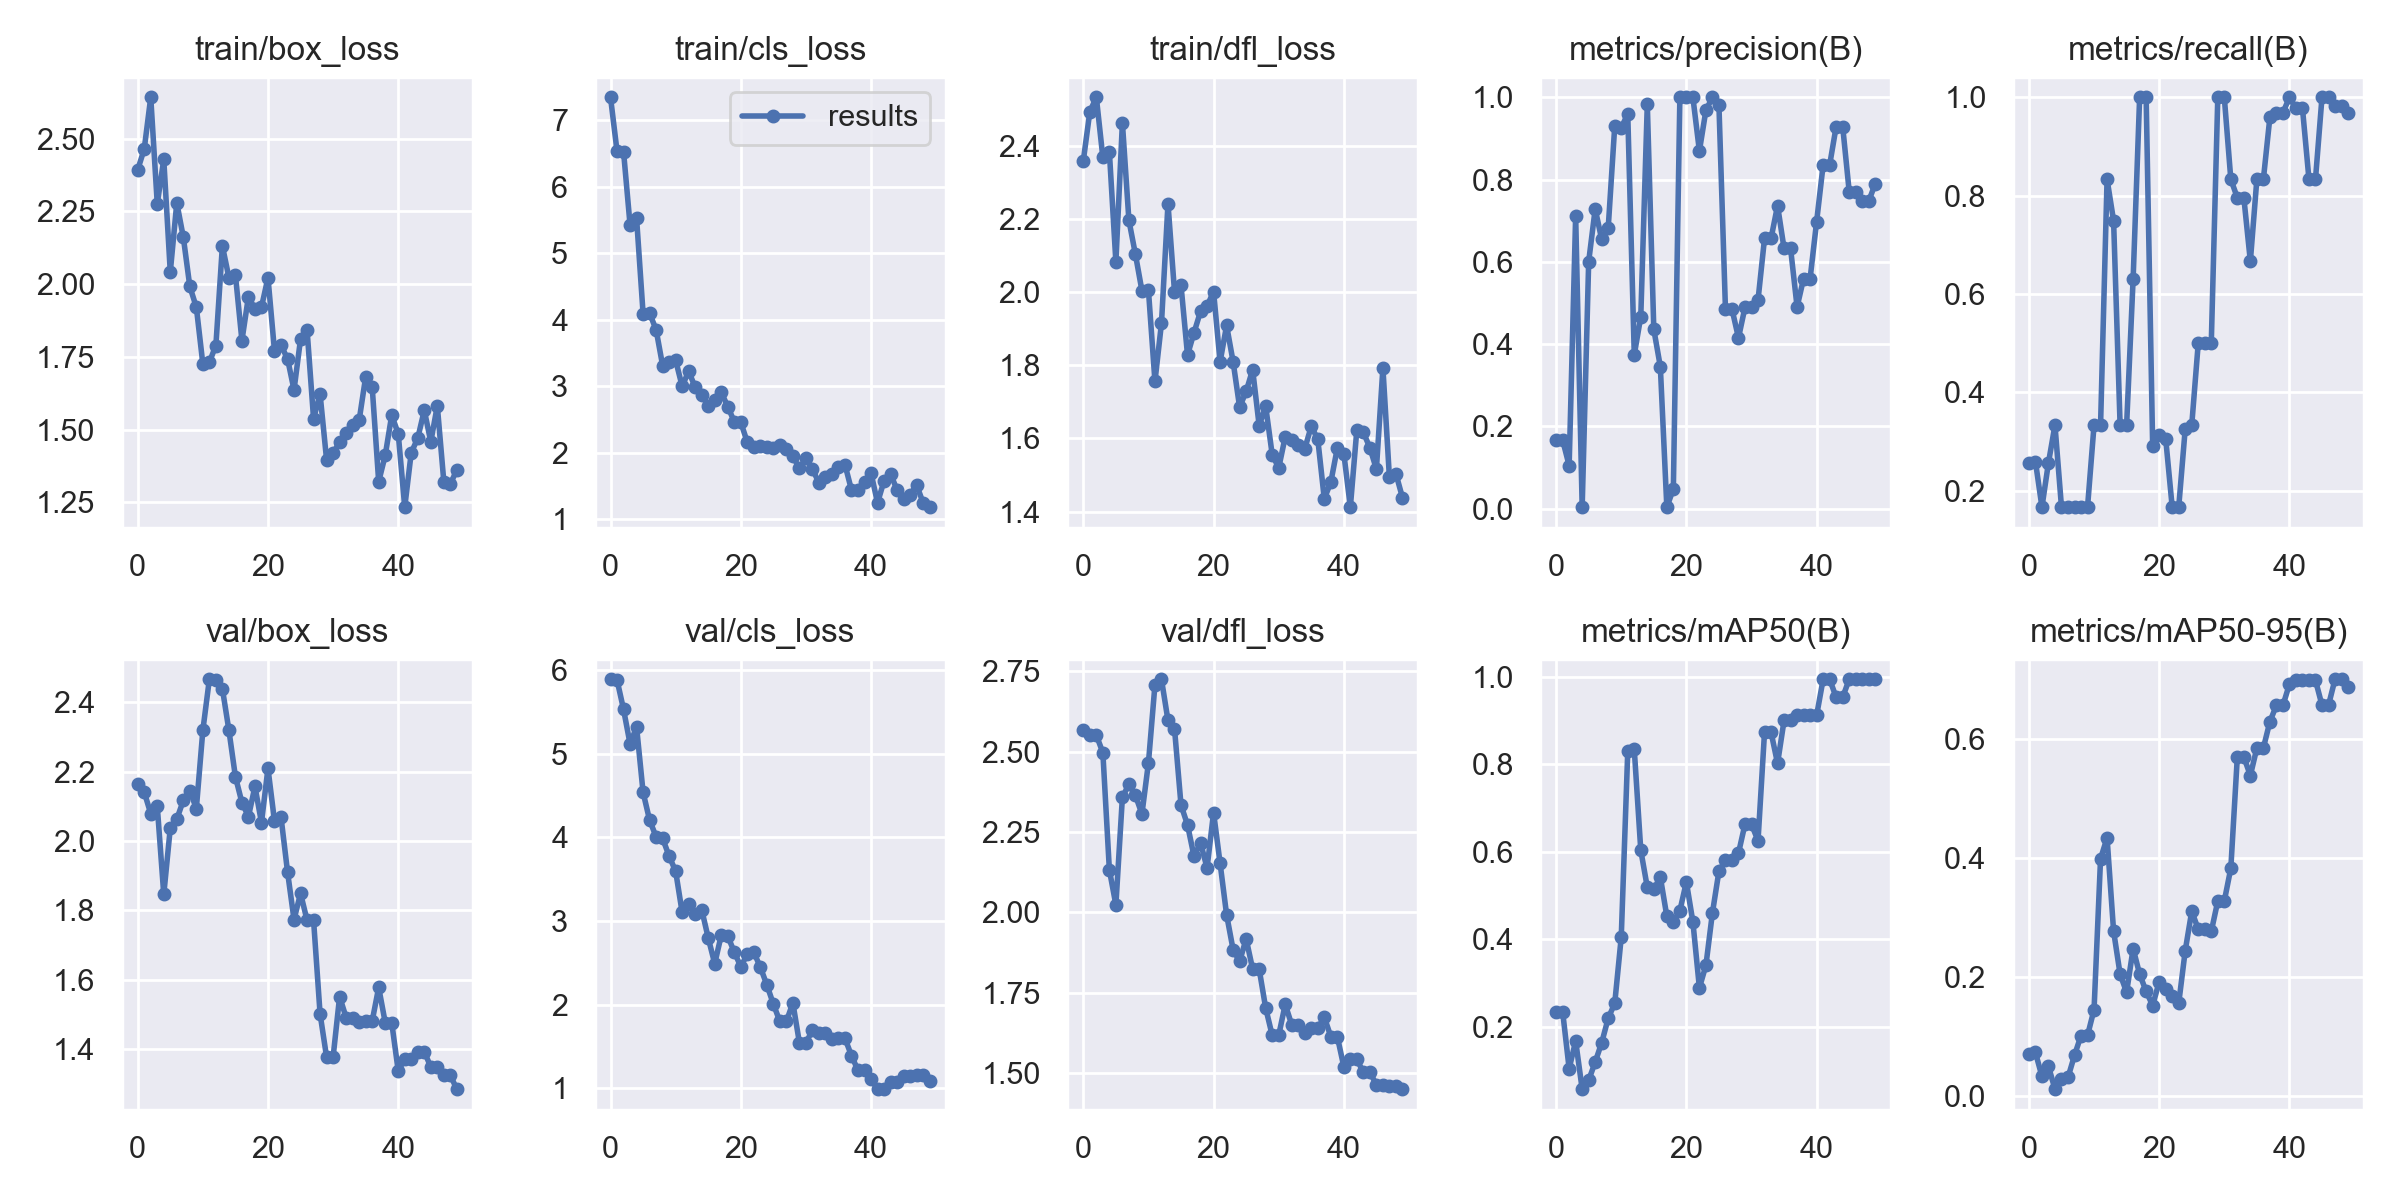

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=600)

C:\Users\raul jay\Desktop\LSC_2


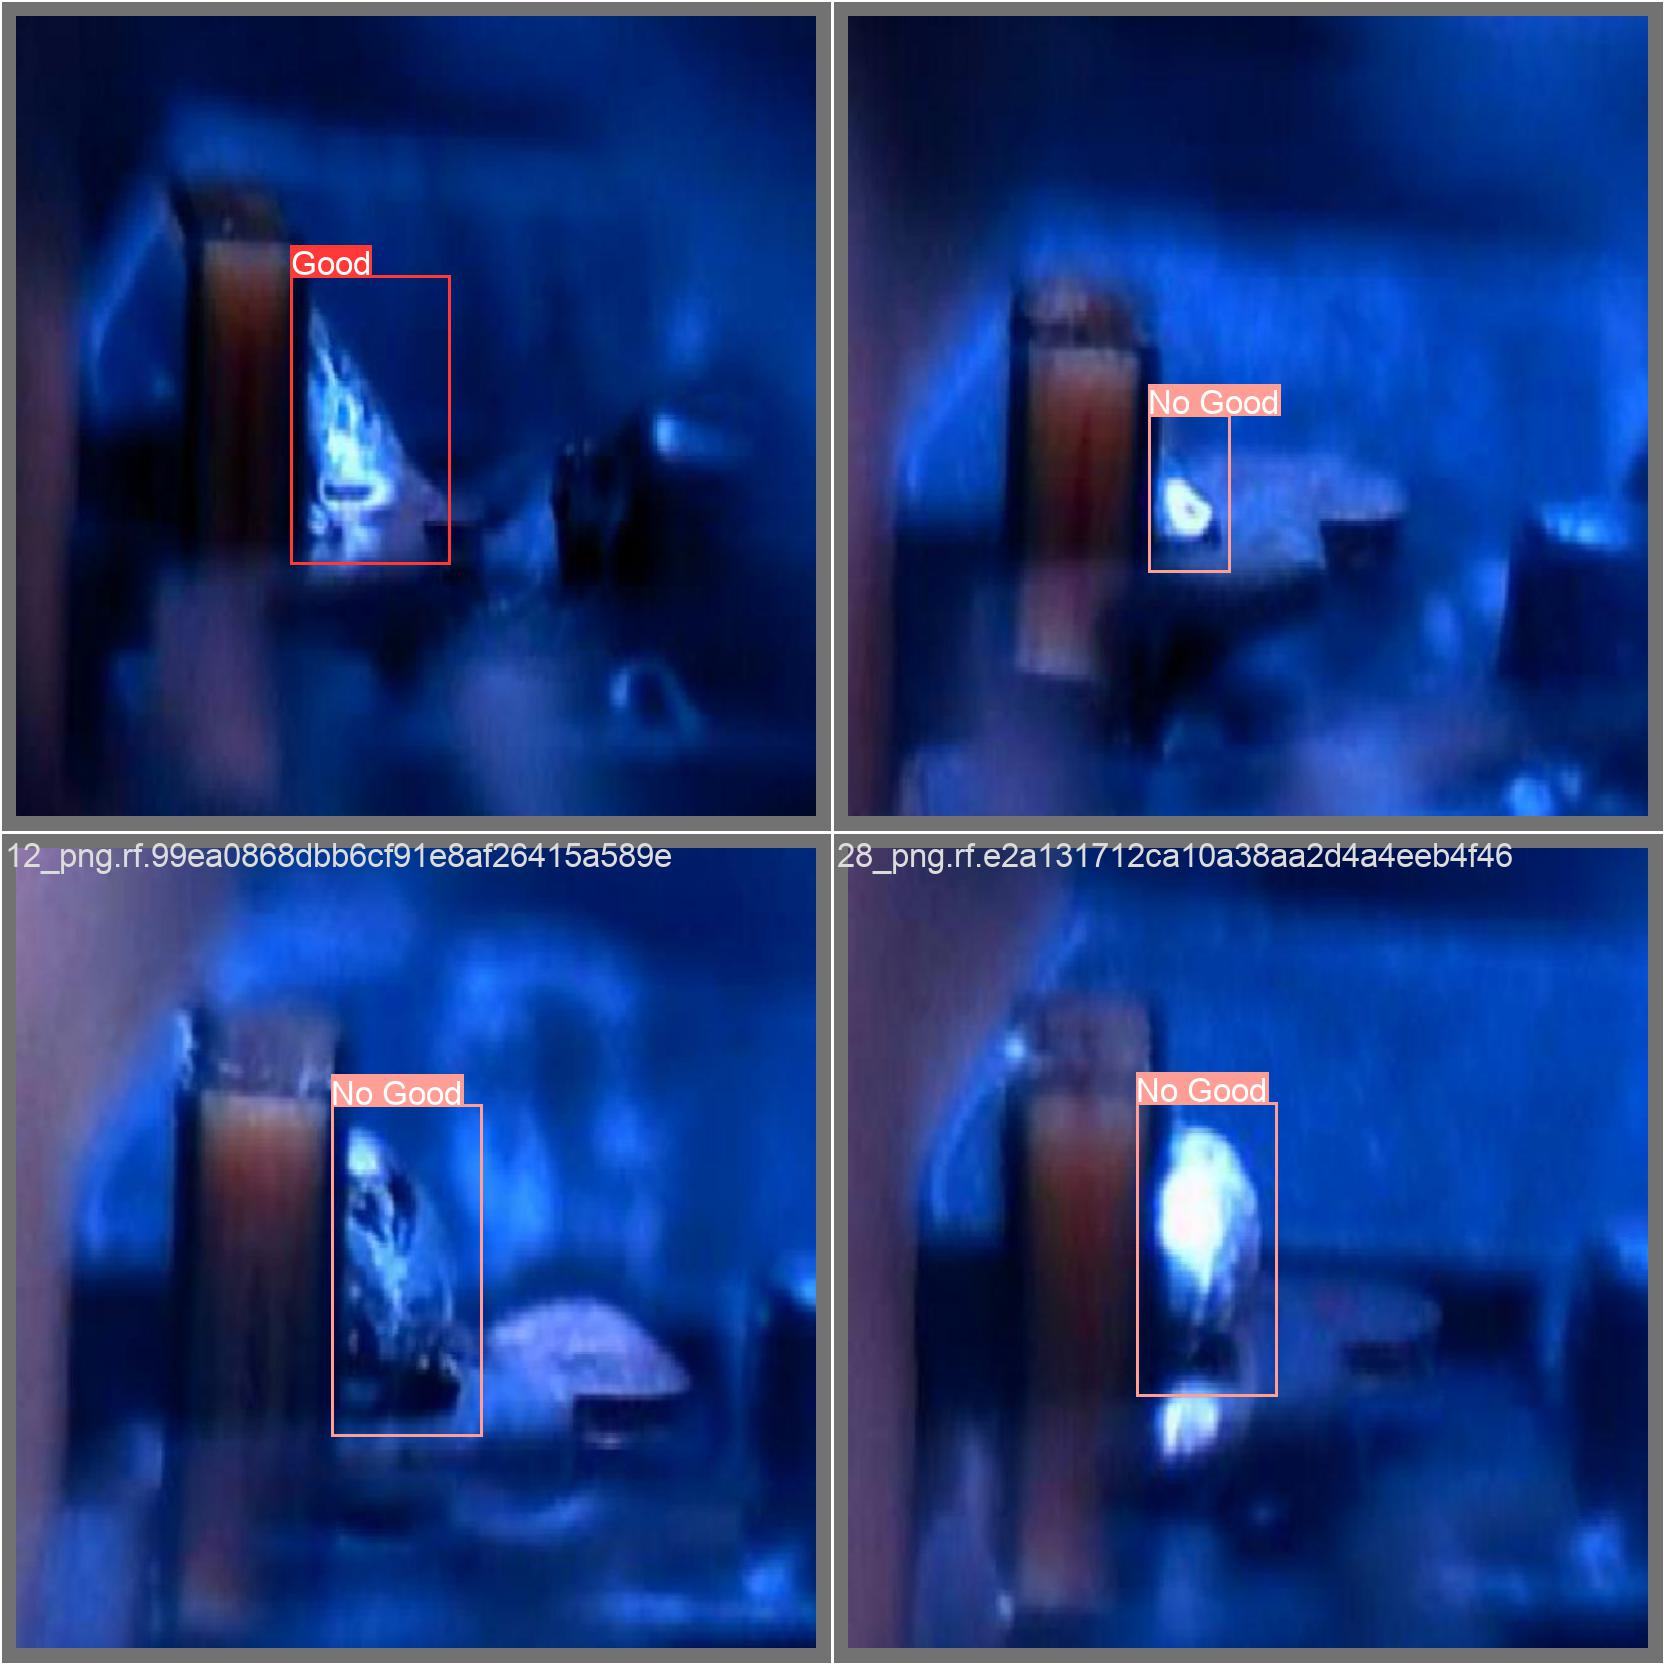

In [22]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_labels.jpg', width=600)

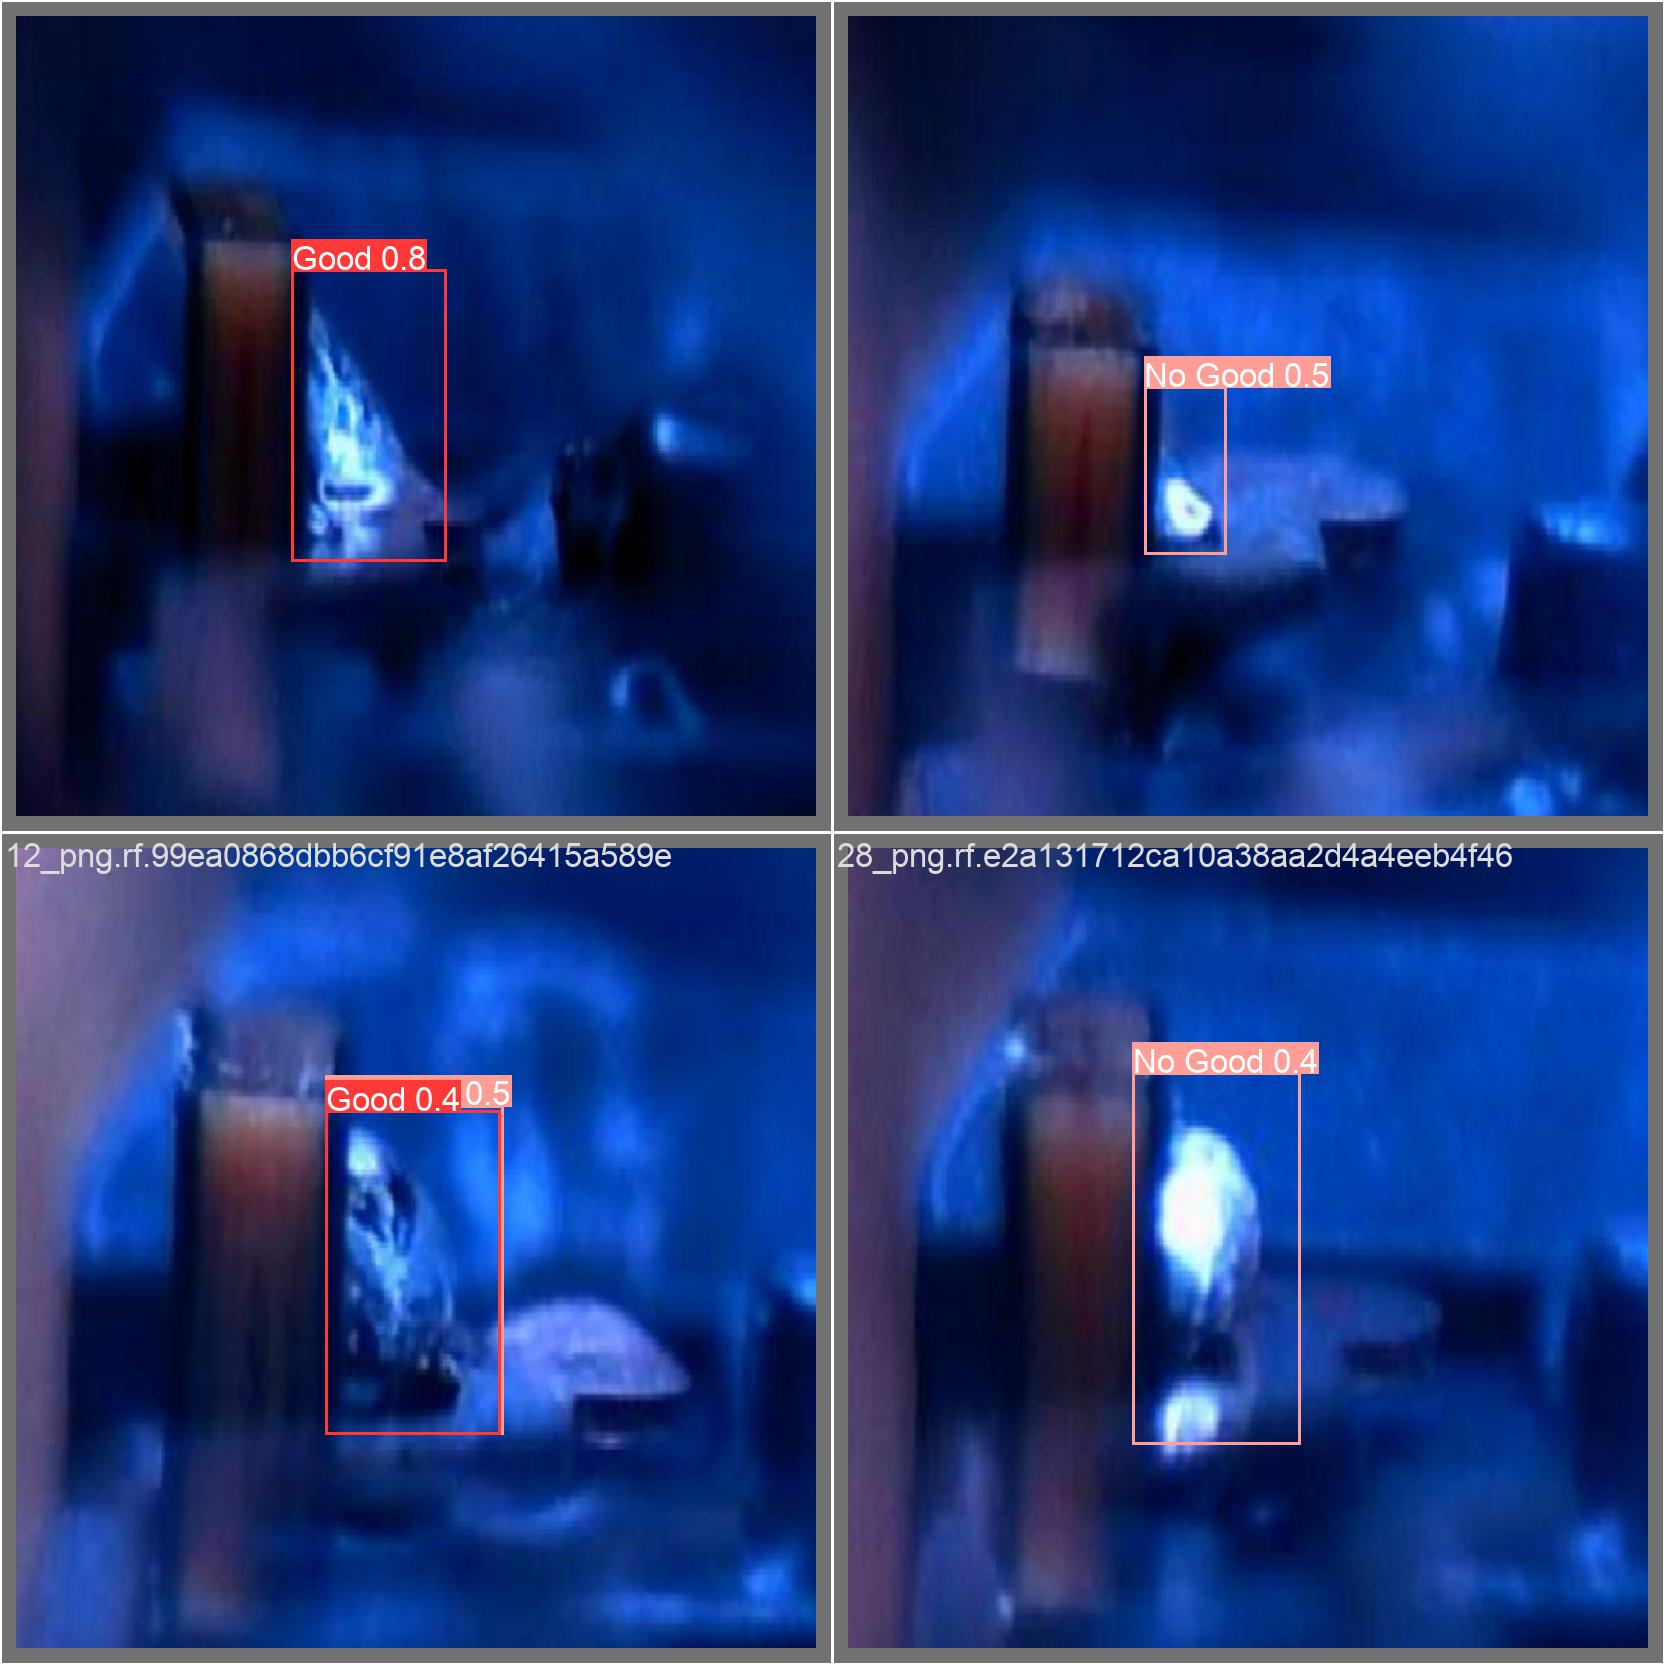

In [23]:
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_pred.jpg', width=600)

## Test Model

In [8]:
!yolo task=detect mode=predict model=runs\detect\train7\weights\best.pt conf=0.25 source='test/Mark.jpg' save=True

Ultralytics YOLOv8.0.20  Python-3.10.9 torch-2.0.1+cpu CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/1 C:\Users\raul jay\Desktop\LSC_2\test\Mark.jpg: 800x608 1 No Good, 488.6ms
Speed: 1.0ms pre-process, 488.6ms inference, 1.0ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs\detect\predict2


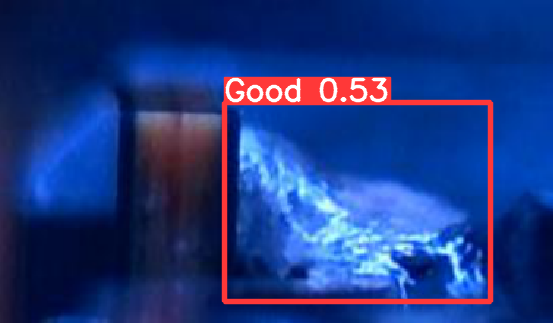

In [16]:
    Image(filename='runs/detect/predict/Test2.png', height=600)